#### Ian Mulchrone 
#### DSC 478 
#### Assignment 1 Part 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. [5 pts] Download the data set adult-modified.csv and load it into an appropriate data structure such as a Pandas dataframe. Explore the general characteristics of the data as a whole: examine the means, standard deviations, and other statistics associated with the numeric attributes and frequencies associated with categorical attributes.

In [3]:
adults = pd.read_csv("adult-modified.csv")
adults.shape

(9412, 8)

In [4]:
adults.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K


In [5]:
adults.describe(include="all")

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,9412.000000,9412,9412.000000,9412,9412,9412,9412.000000,9412
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Married,White,Male,NaN,<=50K
freq,NaN,6947,NaN,4737,8062,6383,NaN,7093
mean,38.357310,NaN,10.125266,NaN,NaN,NaN,41.080217,NaN
std,12.962135,NaN,2.542118,NaN,NaN,NaN,11.884590,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,28.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,47.000000,NaN,13.000000,NaN,NaN,NaN,45.000000,NaN


2. [5 pts] For the three numeric attributes (age, hours-per-week, education), display box plots that show the overall dispersion and skew in these variables. Next, create histograms for these three variables showing the overall data distribution in each. Finally, display a scatter plot of age (x-axis) vs. hours-per-week (y-axis).

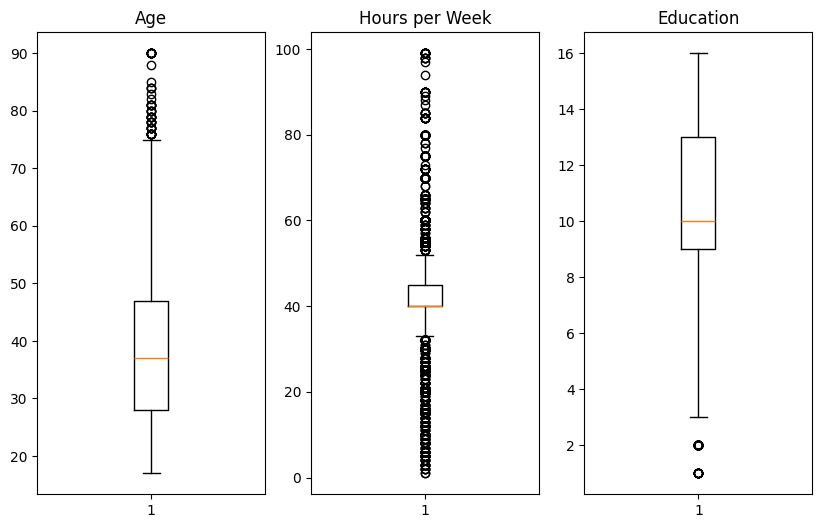

In [6]:
#Boxplots
fig, ax = plt.subplots(1,3, figsize = (10,6))

#Age
ax[0].boxplot(adults["age"])
ax[0].set_title("Age")

#Hours-per-week
ax[1].boxplot(adults["hours-per-week"])
ax[1].set_title("Hours per Week")

#Education
ax[2].boxplot(adults["education"])
ax[2].set_title("Education")

plt.show()

Anyone working above the age of 75 is considered an outlier, while 18 is the minimum adult age so there is no data for working people under that age. 50% of people are working between 40-45 hours per week, leading to many outliers of people working less than ~35 hours or more than 50. The mean education level is 10 and, having the lowest range of outcomes, has only 2 outliers for people with an education level less than 3.

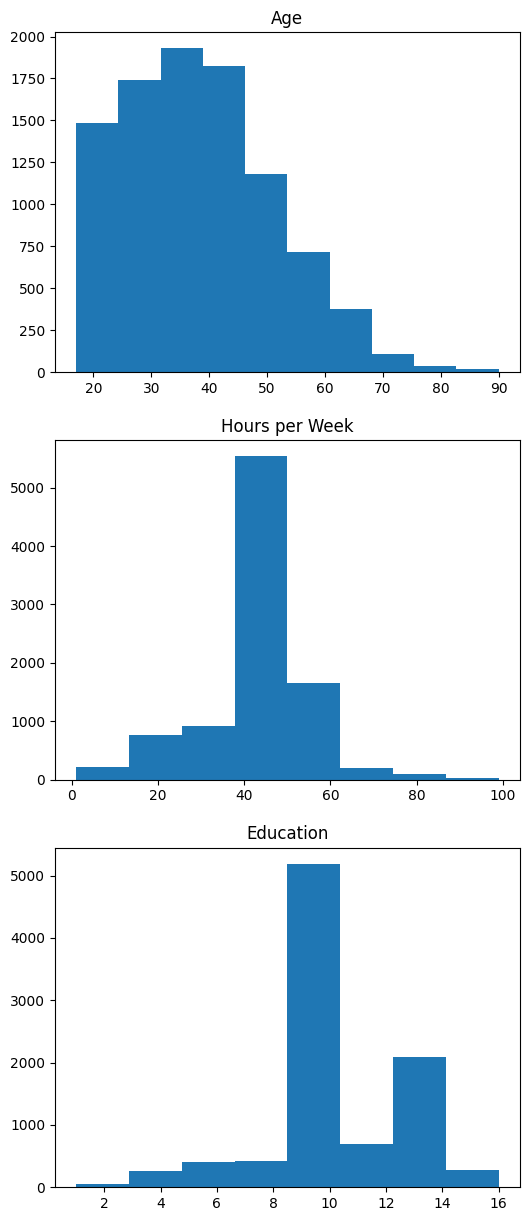

In [ ]:
#Histograms
fig, ax = plt.subplots(3,1, figsize = (6,15))

#Age
ax[0].hist(adults["age"],bins=10)
ax[0].set_title("Age")

#Hours-per-week
ax[1].hist(adults["hours-per-week"], bins=8)
ax[1].set_title("Hours per Week")

#Education
ax[2].hist(adults["education"], bins=8)
ax[2].set_title("Education")

plt.show()

The right skew of the age data is the result of 18 being the minimum age for adults, with the mode being 35-40. 40-50 hours per week is by far the most common number of hours worked. Similarly, 9-10 education level is the most common, with the second most being 13-14.

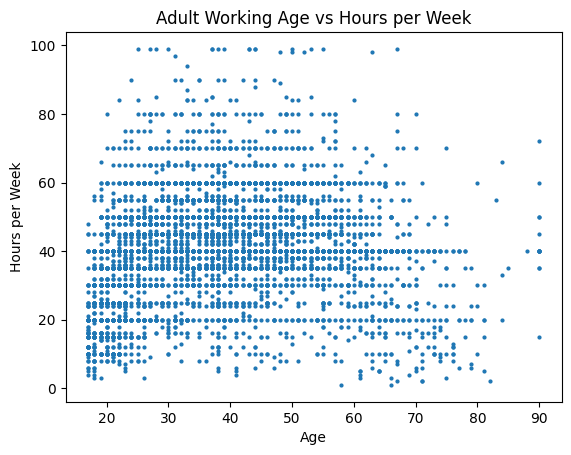

In [8]:
#Scatterplot age vs hours
plt.scatter(adults["age"],adults["hours-per-week"],s=4)
plt.xlabel("Age")
plt.ylabel("Hours per Week")
plt.title("Adult Working Age vs Hours per Week")
plt.show()

From 18-30 years old, the number of hours worked per week increases and then remains steady until 50 years old, where working hours begin to decrease from there.

3. [5 pts] For the remaining categorical attributes create bar charts that show the distribution of category frequencies (e.g., married vs. single; private vs. public vs. self-emp; etc. Ideally, you should these bar charts in a single figure similar to this figure.

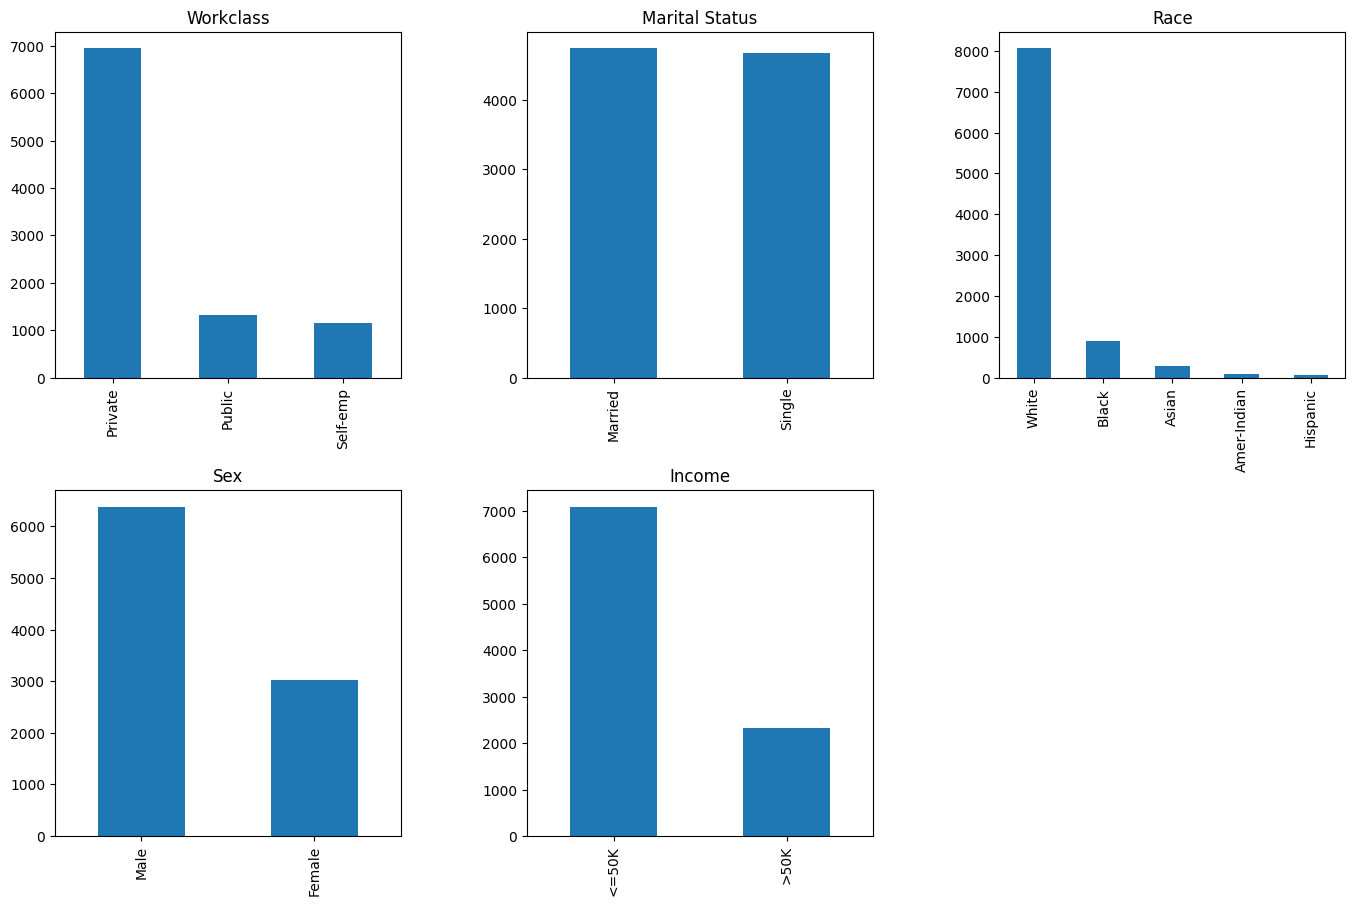

In [9]:
#Bar charts
fig, ax = plt.subplots(2,3, figsize = (15,10))
fig.tight_layout(pad=6)
fig.delaxes(ax[1,2])

#Workclass
ax[0,0].set_title("Workclass")
adults["workclass"].value_counts().plot(kind="bar",ax=ax[0,0])
ax[0,0].set_xlabel("")

#Marital-status
ax[0,1].set_title("Marital Status")
adults["marital-status"].value_counts().plot(kind="bar",ax=ax[0,1])
ax[0,1].set_xlabel("")

# #Race
ax[0,2].set_title("Race")
adults["race"].value_counts().plot(kind="bar",ax=ax[0,2])
ax[0,2].set_xlabel("")

# #Sex
ax[1,0].set_title("Sex")
adults["sex"].value_counts().plot(kind="bar",ax=ax[1,0])
ax[1,0].set_xlabel("")

# #Income
ax[1,1].set_title("Income")
adults["income"].value_counts().plot(kind="bar",ax=ax[1,1])
ax[1,1].set_xlabel("")

plt.show()

The most likely person selected from this data set is a white male working in the private sector that makes <= 50k. Marital status is the only variable with a relatively equal distribution between married and single adults.

4. [5 pts] Perform a cross-tabulations of each of the workclass and race attributes with the income attribute. Show the resulting cross-tab tables as well as bar charts to visualize the relationships between these pairs of attributes. [Hint: you can use aggregation functions in Pandas such as groupby() and  cross-tab(), then either using Matplotlib directly or the plot() function in Pandas create the bar charts]. As an illustration, consider this graph depicting the cross-tabulation of sex with income. In the case of race vs. income cross-tab, create another chart comparing the percentages of each race category that fall in the low-income group. Remember to comment on observations.

In [10]:
# workclass_income = adults.groupby(['workclass','income'])['income'].count()
workclass_income = pd.crosstab(adults['workclass'],adults['income'])
workclass_income

income,<=50K,>50K
workclass,,
Private,5443,1504
Public,925,392
Self-emp,725,423


<Axes: xlabel='workclass'>

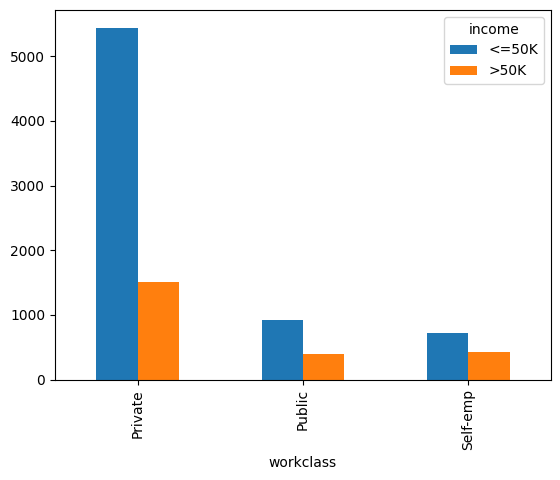

In [11]:
workclass_income.plot(kind='bar')

Self-employed workers have the highest percentage of people making more than 50k. Private is by far the largest sector with about 75% of workers making less than 50k.

In [12]:
race_income = pd.crosstab(adults['race'],adults['income'])
race_income

income,<=50K,>50K
race,,
Amer-Indian,83,9
Asian,224,67
Black,773,119
Hispanic,69,6
White,5944,2118


<Axes: xlabel='race'>

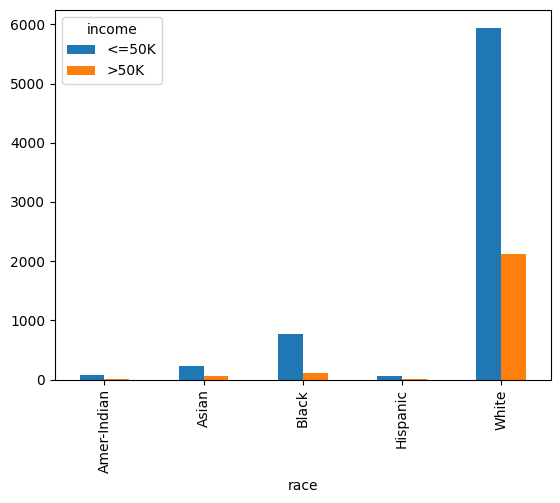

In [13]:
race_income.plot(kind='bar')

White workers make up the vast majority of workers in the dataset. American Indian and Hispanic have very few workers represented.

In [14]:
race_income["pct_low_income"] = race_income["<=50K"]/(race_income["<=50K"]+race_income[">50K"])
race_income

income,<=50K,>50K,pct_low_income
race,,,
Amer-Indian,83,9,0.902174
Asian,224,67,0.769759
Black,773,119,0.866592
Hispanic,69,6,0.920000
White,5944,2118,0.737286


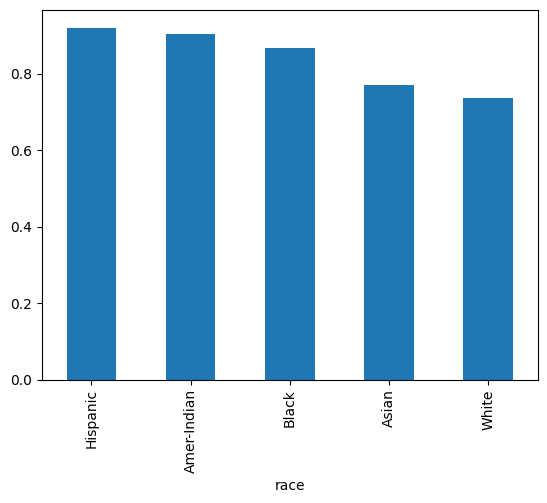

In [15]:
race_income.sort_values("pct_low_income",inplace=True,ascending=False)
plt.show(race_income["pct_low_income"].plot(kind="bar"))

Hispanic workers have the highest percentage of low income workers. White workers are the highest paid of all races.

5. [10 pts] Compare and contrast the characteristics of the low-income and high-income categories across the different attributes. You may consider first creating separate subsets of the data based on the income categories and then characterizing each subset by observing summary statistics for each group across different variables. Discuss your observations focusing specifically on unique characteristics that seem to distinguish among the two groups. You may (though you are not required to) use charts or plots for visualizing the differences in your analysis.

In [16]:
low_income = adults.loc[adults["income"]=="<=50K"]
low_income.describe(include="all")

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,7093.000000,7093,7093.000000,7093,7093,7093,7093.000000,7093
unique,NaN,3,NaN,2,5,2,NaN,1
top,NaN,Private,NaN,Single,White,Male,NaN,<=50K
freq,NaN,5443,NaN,4363,5944,4424,NaN,7093
mean,36.635979,NaN,9.646976,NaN,NaN,NaN,39.567038,NaN
std,13.339117,NaN,2.397358,NaN,NaN,NaN,11.868506,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,26.000000,NaN,9.000000,NaN,NaN,NaN,38.000000,NaN
50%,35.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
75%,45.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN


In [17]:
high_income = adults.loc[adults["income"]==">50K"]
high_income.describe(include="all")

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,2319.000000,2319,2319.000000,2319,2319,2319,2319.000000,2319
unique,NaN,3,NaN,2,5,2,NaN,1
top,NaN,Private,NaN,Married,White,Male,NaN,>50K
freq,NaN,1504,NaN,2007,2118,1959,NaN,2319
mean,43.622251,NaN,11.588185,NaN,NaN,NaN,45.708495,NaN
std,10.047667,NaN,2.410764,NaN,NaN,NaN,10.678794,NaN
min,19.000000,NaN,2.000000,NaN,NaN,NaN,1.000000,NaN
25%,36.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,43.000000,NaN,12.000000,NaN,NaN,NaN,40.000000,NaN
75%,50.000000,NaN,13.000000,NaN,NaN,NaN,50.000000,NaN


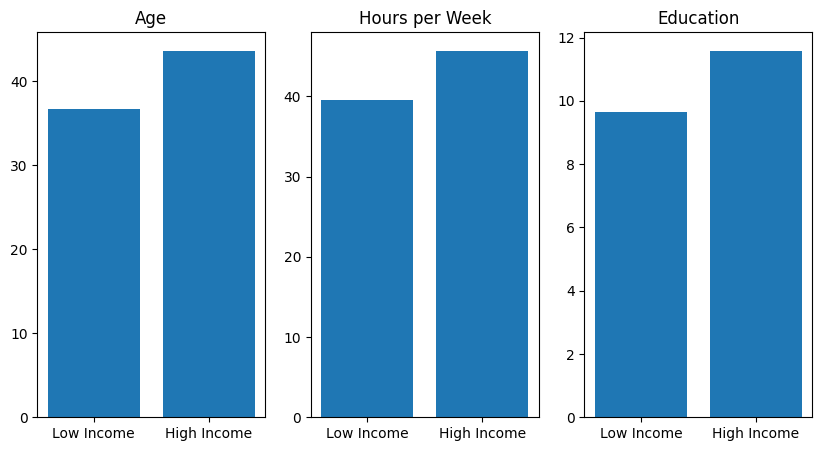

In [18]:
fig, ax = plt.subplots(1,3, figsize = (10,5))

x_labels = ["Low Income", "High Income"]
age_y = [low_income["age"].mean(), high_income["age"].mean()]
#Age
ax[0].bar(x_labels, age_y)
ax[0].set_title("Age")

hours_y = [low_income["hours-per-week"].mean(), high_income["hours-per-week"].mean()]
#Hours-per-week
ax[1].bar(x_labels, hours_y)
ax[1].set_title("Hours per Week")

#Education
education_y = [low_income["education"].mean(), high_income["education"].mean()]
ax[2].bar(x_labels, education_y)
ax[2].set_title("Education")

plt.show()

High income earners have a higher average age, number of hours per week, and education level. Although age is out of one's control, improving edcuation level or working more hours per week can lead to an increase in income.

6. [5 pts] Convert the data into the a data matrix (all numeric values). Note that this requires converting each categorical attribute into multiple binary ("dummy") attributes (one for each values of the categorical attribute) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record). The numeric attributes should remain unchanged. Save this data in a new dataframe and show the top 10 rows in the new dataframe. Also save this new table into a local file called adult_numeric.csv.

In [19]:
adults_d = pd.get_dummies(adults, dtype = int)
adults_d.head(10)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0
5,37,14,40,1,0,0,1,0,0,0,0,0,1,1,0,1,0
6,49,5,16,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7,52,9,45,0,0,1,1,0,0,0,0,0,1,0,1,0,1
8,31,14,50,1,0,0,0,1,0,0,0,0,1,1,0,0,1
9,42,13,40,1,0,0,1,0,0,0,0,0,1,0,1,0,1


In [20]:
adults_d.to_csv("adult_numeric.csv")

7. [10 pts] Using the numeric data set with the dummy variables (of the previous part), perform basic correlation analysis among the attributes. You need to construct a complete Correlation Matrix (with rows and columns corresponding to each variable). [Hint: you can create the correlation matrix by using the corr() function in Pandas or corrcoef function in NumPy].
Give the name of one other method of correlation in corr(). (what type of data does it apply to?)
Next, using your correlation matrix, display in decreasing order of correlations, all attributes and their correlations to education. Repeat this step to display correlations with the attribute income_<=50K. Briefly discuss your general observations about this sample of adult population based on this correlation analysis.

In [21]:
corr_matrix = adults_d.corr()
corr_matrix

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
age,1.000000,0.034733,0.103170,-0.202982,0.080254,0.187633,0.381168,-0.381168,-0.010904,-0.008097,-0.008668,-0.031973,0.022413,-0.071804,0.071804,-0.232261,0.232261
education,0.034733,1.000000,0.141730,-0.154977,0.154462,0.044472,0.050627,-0.050627,-0.039308,0.057360,-0.069029,-0.044845,0.051765,-0.008180,0.008180,-0.329066,0.329066
hours-per-week,0.103170,0.141730,1.000000,-0.097753,-0.021407,0.154025,0.183944,-0.183944,0.002964,0.000550,-0.071442,0.011964,0.055561,-0.221588,0.221588,-0.222686,0.222686
workclass_Private,-0.202982,-0.154977,-0.097753,1.000000,-0.677134,-0.625700,-0.121014,0.121014,-0.007136,-0.015060,0.004632,0.023490,-0.000389,0.072569,-0.072569,0.116453,-0.116453
workclass_Public,0.080254,0.154462,-0.021407,-0.677134,1.000000,-0.150335,-0.002351,0.002351,0.022185,0.012883,0.070250,-0.018927,-0.066491,0.045338,-0.045338,-0.047981,0.047981
workclass_Self-emp,0.187633,0.044472,0.154025,-0.625700,-0.150335,1.000000,0.165075,-0.165075,-0.013931,0.006576,-0.080694,-0.011495,0.071008,-0.145559,0.145559,-0.105593,0.105593
marital-status_Married,0.381168,0.050627,0.183944,-0.121014,-0.002351,0.165075,1.000000,-1.000000,-0.013614,0.017852,-0.104427,0.000605,0.082114,-0.357736,0.357736,-0.414173,0.414173
marital-status_Single,-0.381168,-0.050627,-0.183944,0.121014,0.002351,-0.165075,-1.000000,1.000000,0.013614,-0.017852,0.104427,-0.000605,-0.082114,0.357736,-0.357736,0.414173,-0.414173
race_Amer-Indian,-0.010904,-0.039308,0.002964,-0.007136,0.022185,-0.013931,-0.013614,0.013614,1.000000,-0.017746,-0.032148,-0.008905,-0.242795,0.021711,-0.021711,0.034254,-0.034254
race_Asian,-0.008097,0.057360,0.000550,-0.015060,0.012883,0.006576,0.017852,-0.017852,-0.017746,1.000000,-0.057795,-0.016009,-0.436496,0.001773,-0.001773,0.006693,-0.006693


In [22]:
adults_d.corr(method="kendall")

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
age,1.000000,0.044373,0.110746,-0.174288,0.076994,0.152539,0.328725,-0.328725,-0.006862,-0.007274,-0.004442,-0.026471,0.015944,-0.066427,0.066427,-0.222192,0.222192
education,0.044373,1.000000,0.121889,-0.135757,0.137978,0.036124,0.044835,-0.044835,-0.033567,0.054008,-0.070019,-0.033919,0.049865,-0.006190,0.006190,-0.282786,0.282786
hours-per-week,0.110746,0.121889,1.000000,-0.076785,-0.026348,0.131092,0.178905,-0.178905,-0.000150,-0.008328,-0.087398,0.006180,0.075620,-0.226635,0.226635,-0.228371,0.228371
workclass_Private,-0.174288,-0.135757,-0.076785,1.000000,-0.677134,-0.625700,-0.121014,0.121014,-0.007136,-0.015060,0.004632,0.023490,-0.000389,0.072569,-0.072569,0.116453,-0.116453
workclass_Public,0.076994,0.137978,-0.026348,-0.677134,1.000000,-0.150335,-0.002351,0.002351,0.022185,0.012883,0.070250,-0.018927,-0.066491,0.045338,-0.045338,-0.047981,0.047981
workclass_Self-emp,0.152539,0.036124,0.131092,-0.625700,-0.150335,1.000000,0.165075,-0.165075,-0.013931,0.006576,-0.080694,-0.011495,0.071008,-0.145559,0.145559,-0.105593,0.105593
marital-status_Married,0.328725,0.044835,0.178905,-0.121014,-0.002351,0.165075,1.000000,-1.000000,-0.013614,0.017852,-0.104427,0.000605,0.082114,-0.357736,0.357736,-0.414173,0.414173
marital-status_Single,-0.328725,-0.044835,-0.178905,0.121014,0.002351,-0.165075,-1.000000,1.000000,0.013614,-0.017852,0.104427,-0.000605,-0.082114,0.357736,-0.357736,0.414173,-0.414173
race_Amer-Indian,-0.006862,-0.033567,-0.000150,-0.007136,0.022185,-0.013931,-0.013614,0.013614,1.000000,-0.017746,-0.032148,-0.008905,-0.242795,0.021711,-0.021711,0.034254,-0.034254
race_Asian,-0.007274,0.054008,-0.008328,-0.015060,0.012883,0.006576,0.017852,-0.017852,-0.017746,1.000000,-0.057795,-0.016009,-0.436496,0.001773,-0.001773,0.006693,-0.006693


Kendall correlation is a non-linear measure generally used for small sample sizes or to be more robust to outliers.

In [23]:
corr_matrix["education"].sort_values(ascending=False)

education                 1.000000
income_>50K               0.329066
workclass_Public          0.154462
hours-per-week            0.141730
race_Asian                0.057360
race_White                0.051765
marital-status_Married    0.050627
workclass_Self-emp        0.044472
age                       0.034733
sex_Male                  0.008180
sex_Female               -0.008180
race_Amer-Indian         -0.039308
race_Hispanic            -0.044845
marital-status_Single    -0.050627
race_Black               -0.069029
workclass_Private        -0.154977
income_<=50K             -0.329066
Name: education, dtype: float64

Education has the highest correlation with income > 50K and highly educated workers are more likely to work in the public sector. Asian workers have the highest education among the sample of workers. Lower educted workers are more likely to work in the private sector and make less than $50,000.

8. [5 pts] Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old"). Do not change the original age attribute or add the discretized age to the table. Create a new dataframe with the numeric and the discretized age attributes as two columns and display the top 10 rows of the new dataframe.

In [24]:
adults_age = adults_d[["age"]].copy()

age_range = adults_age["age"].max() - adults_age["age"].min()
bins = [adults_age["age"].min(),
        round(adults_age["age"].min()+(age_range*0.33)),
        round(adults_age["age"].min()+(age_range*0.66)),np.inf]
names = ["young","mid-age","old"]

adults_age["age_cat"] = pd.cut(adults_age["age"], bins, labels=names)

adults_age.head(10)

,age,age_cat
0,39,young
1,50,mid-age
2,38,young
3,53,mid-age
4,28,young
5,37,young
6,49,mid-age
7,52,mid-age
8,31,young
9,42,mid-age


9. [10 pts] Use Min-Max Normalization to transform the values of the attribute hours-per-week the range 0.0-1.0 (without changing the original data). Next, perform zscore normalization to standardize the values of all numeric attributes (age, hours-per-week, education). The latter step should be performed on all three attributes at the same time instead of one-by-one (you may wish to first create a separate dataframe with only these attributes and perform the operation on the whole dataframe. Note: for this problem, you should write your own code to perform the normalization; do not use pre-existing functions such as scikit-learn's MinMaxScaler(). Finally, show the top 10 rows of the three versions of the hours-per-week attribute (original, normalized, and standardized) side-by-side in a new dataframe.

In [25]:
adults_norm = adults[["age","hours-per-week","education"]].copy()

adults_norm["hours_min_max"] = ((adults_norm["hours-per-week"]-adults_norm["hours-per-week"].min()) / 
                                (adults_norm["hours-per-week"].max() - adults_norm["hours-per-week"].min()))

adults_norm.head(10)

,age,hours-per-week,education,hours_min_max
0,39,40,13,0.397959
1,50,13,13,0.122449
2,38,40,9,0.397959
3,53,40,7,0.397959
4,28,40,13,0.397959
5,37,40,14,0.397959
6,49,16,5,0.153061
7,52,45,9,0.448980
8,31,50,14,0.500000
9,42,40,13,0.397959


In [26]:
adults_zscore = adults[["age","hours-per-week","education"]].copy()
adults_zscore = (adults_zscore - adults_zscore.mean()) / adults_zscore.std()
adults_zscore.head(10)

,age,hours-per-week,education
0,0.049582,-0.090892,1.130842
1,0.898208,-2.362742,1.130842
2,-0.027566,-0.090892,-0.442649
3,1.129651,-0.090892,-1.229394
4,-0.799044,-0.090892,1.130842
5,-0.104713,-0.090892,1.524215
6,0.821060,-2.110314,-2.016140
7,1.052503,0.329821,-0.442649
8,-0.567600,0.750534,1.524215
9,0.281025,-0.090892,1.130842


In [27]:
adults_hours = adults_norm[['hours-per-week','hours_min_max']].copy()
adults_hours["hours_zscore"] = adults_zscore["hours-per-week"]
adults_hours.head(10)

,hours-per-week,hours_min_max,hours_zscore
0,40,0.397959,-0.090892
1,13,0.122449,-2.362742
2,40,0.397959,-0.090892
3,40,0.397959,-0.090892
4,40,0.397959,-0.090892
5,40,0.397959,-0.090892
6,16,0.153061,-2.110314
7,45,0.448980,0.329821
8,50,0.500000,0.750534
9,40,0.397959,-0.090892


10. [10 pts] Now download a modified version of the data  (adult-modified-missing-vals.csv) that contains missing values. (a) Using Pandas determine all the attributes with missing values and the number of missing values for each such attribute. (b) Show all the instances in the data that contain a missing value. (c) Fill the missing values for all numeric attributes using the mean value for the attribute. (d) After filling in the missing numeric values, drop all rows where a categorical attribute contains a missing value. (e) Show that the final resulting table does not contain missing values.

In [31]:
adults_miss = pd.read_csv("adult-modified-missing-vals.csv", na_values=["?"])
adults_miss.head(10)

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K
5,37.0,Private,14,Married,White,Female,40,<=50K
6,49.0,Private,5,Married,Black,Female,16,<=50K
7,52.0,Self-emp,9,Married,White,Male,45,>50K
8,31.0,Private,14,Single,White,Female,50,>50K
9,42.0,Private,13,Married,White,Male,40,>50K


In [32]:
#a
adults_miss.isna().sum()

age               198
workclass         588
education           0
marital-status      0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64

In [38]:
#b
adults_miss[adults_miss.isnull().any(axis=1)]

,age,workclass,education,marital-status,race,sex,hours-per-week,income
19,NaN,Self-emp,14,Single,White,Female,45,>50K
27,NaN,NaN,10,Married,Asian,Male,60,>50K
40,NaN,Private,5,Married,White,Male,43,<=50K
61,32.0,NaN,4,Married,White,Male,40,<=50K
65,NaN,Private,9,Married,White,Male,40,<=50K
...,...,...,...,...,...,...,...,...
9965,NaN,Private,10,Married,Amer-Indian,Female,40,<=50K
9966,NaN,Private,13,Married,White,Male,50,>50K
9987,67.0,NaN,4,Married,White,Male,40,<=50K
9993,NaN,Private,9,Married,White,Female,15,<=50K


In [ ]:
#c
adults_miss.fillna({"age":adults_miss["age"].mean()}, axis=0, inplace=True)
adults_miss.isna().sum()

age                 0
workclass         588
education           0
marital-status      0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64

In [43]:
#d
adults_miss.drop(adults_miss[adults_miss.workclass.isnull()].index, axis=0, inplace=True)

In [45]:
#e
adults_miss.isna().sum()

age               0
workclass         0
education         0
marital-status    0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64

All numeric null values have been replaced with the mean for that attribute and all rows with null categorical values have been dropped.